In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn
import re
#import
%matplotlib inline

Source: https://www.kaggle.com/saurograndi/airplane-crashes-since-1908

Analysis of the public dataset: "Airplane Crashes and Fatalities Since 1908" (Full history of airplane crashes throughout the world, from 1908-present) hosted by Open Data by Socrata available at:

https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq

Questions

    Yearly how many planes crashed? how many people were on board? how many survived? how many died?
    Highest number of crashes by operator and Type of aircrafts.
    ‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.
    Find the number of crashed aircrafts and number of deaths against each category from above step.
    Find any interesting trends/behaviors that you encounter when you analyze the dataset.


In [3]:
df= pd.read_csv("/media/radial/Work/Work/Work on datasets/Airplane crash*/Airplane_Crashes_and_Fatalities_Since_1908.csv")
df.head()

Date   Time                            Location  \
0  09/17/1908  17:18                 Fort Myer, Virginia   
1  07/12/1912  06:30             AtlantiCity, New Jersey   
2  08/06/1913    NaN  Victoria, British Columbia, Canada   
3  09/09/1913  18:30                  Over the North Sea   
4  10/17/1913  10:30          Near Johannisthal, Germany   

                 Operator Flight #          Route                    Type  \
0    Military - U.S. Army      NaN  Demonstration        Wright Flyer III   
1    Military - U.S. Navy      NaN    Test flight               Dirigible   
2                 Private        -            NaN        Curtiss seaplane   
3  Military - German Navy      NaN            NaN  Zeppelin L-1 (airship)   
4  Military - German Navy      NaN            NaN  Zeppelin L-2 (airship)   

  Registration cn/In  Aboard  Fatalities  Ground  \
0          NaN     1     2.0         1.0     0.0   
1          NaN   NaN     5.0         5.0     0.0   
2          NaN   NaN     1.0         1.0     0.0   
3          NaN   NaN    20.0        14.0     0.0   
4          NaN   NaN    30.0        30.0     0.0   

                                             Summary  
0  During a demonstration flight, a U.S. Army fly...  
1  First U.S. dirigible Akron exploded just offsh...  
2  The first fatal airplane accident in Canada oc...  
3  The airship flew into a thunderstorm and encou...  
4  Hydrogen gas which was being vented was sucked...

In [5]:
df.shape

(5268, 13)

In [22]:
len(df["Time"].value_counts())

1005

In [21]:
len(df["Date"].value_counts())

4753

In [19]:
len(df["Fatalities"].value_counts())

191

In [20]:
len(df["Ground"].value_counts())

50

In [17]:
len(df["cn/In"].value_counts())

3707

In [18]:
len(df["Aboard"].value_counts())

239

In [16]:
len(df["Registration"].value_counts())

4905

In [14]:
len(df["Route"].value_counts())

3244

In [15]:
len(df["Type"].value_counts())

2446

In [13]:
len(df["Flight #"].value_counts())

724

In [10]:
len(df.Operator.value_counts())

2476

In [11]:
len(df.Location.value_counts())

4303

In [6]:
df.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [4]:
df.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

# 70s, the dangerous period to fly

{'boxes': [<matplotlib.lines.Line2D at 0x7f0e5ae405f8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0e5ae46fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0e5add0b70>],
 'means': [<matplotlib.lines.Line2D at 0x7f0e5add0390>],
 'medians': [<matplotlib.lines.Line2D at 0x7f0e5adcab00>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0e5ae40fd0>,
  <matplotlib.lines.Line2D at 0x7f0e5ae46860>]}

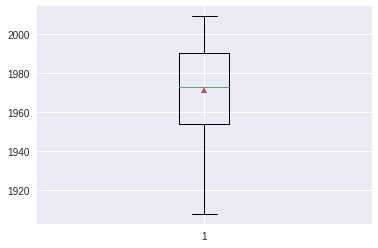

In [30]:
plt.boxplot(s,showmeans=True)

In [75]:
ind = df.Time.value_counts(dropna=True).index

(array([ 892.,  455.,  378.,  370.,  385.,  428.,  476.,  458.,  454.,  972.]),
 array([  1. ,   2.1,   3.2,   4.3,   5.4,   6.5,   7.6,   8.7,   9.8,
         10.9,  12. ]),
 <a list of 10 Patch objects>)

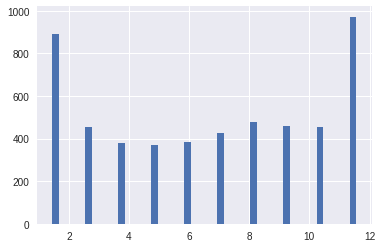

In [91]:
s=[]
for i in range(len(df.Date)):
    s.append(int(df.Date[i][:2]))
    #print(df.Date[i][:2])
plt.hist(s, rwidth=0.2)

# April May and June, safe to fly

(array([ 204.,  114.,  145.,  455.,  339.,  323.,  493.,  302.,  335.,  325.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

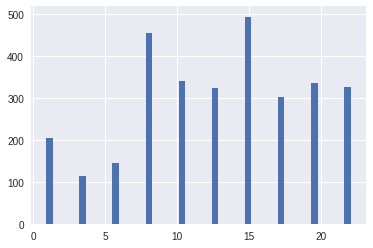

In [80]:
s=[]
for i in range(len(df.Date)):
    if(df.Date[i] in ind and df.Date[i][:].isdigit()):
        s.append(int(df.Time[i][:2]))
        #print(df.Time[i][:2])
plt.hist(s, rwidth=0.2)

# Early to flight and late to flight makes the probability of living high

In [87]:
#plt.hist(df.Route.value_counts(), rwidth=0.2)
df.Route.value_counts()

Training                                         81
Sightseeing                                      29
Test flight                                      17
Test                                              6
Sao Paulo - Rio de Janeiro                        5
Sao Paulo - Porto Alegre                          4
Villavicencio - Mitu                              4
Saigon - Paris                                    4
Bogota - Barranquilla                             4
Guayaquil - Cuenca                                3
London - Glasgow                                  3
Barranquilla - Bogota                             3
Burbank - Oakland                                 3
Santiago de Cuba - Havana                         3
Rio de Janeiro - Sao Paulo                        3
Davao - Manila                                    3
Lagos - Abuja                                     3
Rome - Athens                                     3
Otis AFB                                          3
Demonstratio

# if not a pilot avoid Sao Paulo - Rio de Janeiro route, if pilot avoid trianing

# Questions

# Yearly how many planes crashed? how many people were on board? how many survived? how many died?

(array([  22.,  147.,  334.,  476.,  596.,  699.,  830.,  711.,  792.,  661.]),
 array([ 1908. ,  1918.1,  1928.2,  1938.3,  1948.4,  1958.5,  1968.6,
         1978.7,  1988.8,  1998.9,  2009. ]),
 <a list of 10 Patch objects>)

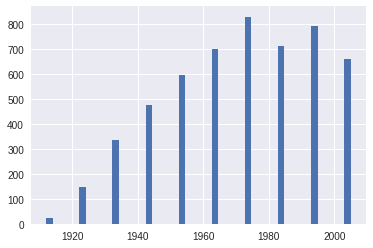

In [114]:
s=[]
for i in range(len(df.Date)):
    s.append(int(df.Date[i][6:]))
plt.hist(s, rwidth=0.2)

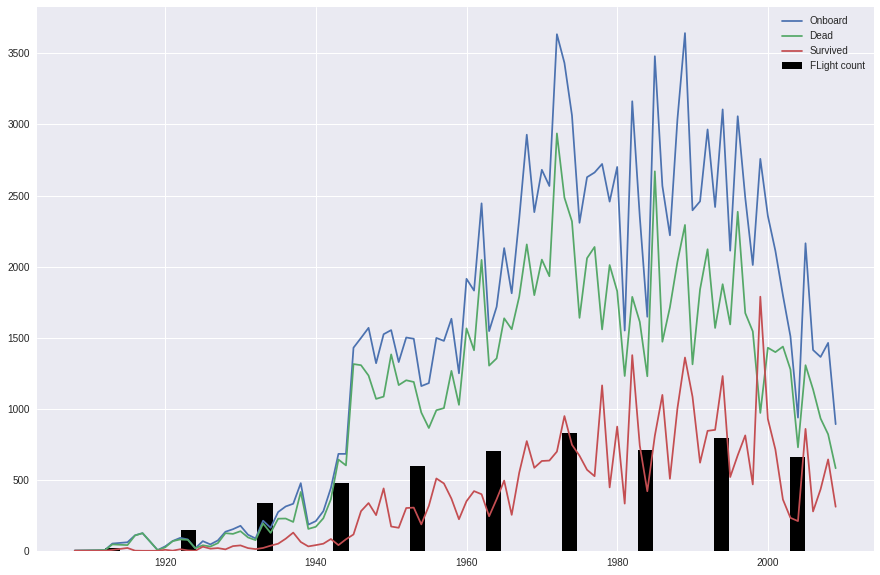

In [145]:
plt.figure(figsize=(15,10))
s=[]
for i in range(len(df.Date)):
    s.append(int(df.Date[i][6:]))
plt.hist(s, rwidth=0.2, label="FLight count",color='k')

s=[]
for i in range(len(df.Date)):
    s.append(int(df.Date[i][6:]))
yearly_onboard= pd.DataFrame([s,list(df.Aboard)]).T
count = yearly_onboard.groupby(0).sum()
plt.plot(count.index,count, label = "Onboard")
#plt.title("Yearly onboard")

s=[]
for i in range(len(df.Date)):
    s.append(int(df.Date[i][6:]))
yearly_deaths= pd.DataFrame([s,list(df.Fatalities)]).T
count = yearly_deaths.groupby(0).sum()
plt.plot(count.index,count, label = "Dead")
#plt.title("Yearly dead")

s=[]
for i in range(len(df.Date)):
    s.append(int(df.Date[i][6:]))
yearly_surv= pd.DataFrame([s,list(df.Aboard - df.Fatalities)]).T
count = yearly_surv.groupby(0).sum()
plt.plot(count.index,count, label = "Survived")
#plt.title("Yearly Survived")
plt.legend()

#     Highest number of crashes by operator and Type of aircrafts.

In [147]:
df.Operator.value_counts()[:10]

Aeroflot                               179
Military - U.S. Air Force              176
Air France                              70
Deutsche Lufthansa                      65
United Air Lines                        44
China National Aviation Corporation     44
Air Taxi                                44
Military - U.S. Army Air Forces         43
Pan American World Airways              41
US Aerial Mail Service                  36
Name: Operator, dtype: int64

In [151]:
dff = df[df["Operator"]=="Aeroflot"]
dff.Type.value_counts()[:10]

Yakovlev YAK-40    19
Antonov AN-24      13
Tupolev TU-104B    10
Tupolev TU-134A    10
Tupolev TU-124      9
Tupolev TU-104A     6
Ilyushin IL-18B     6
Antonov AN-26       6
Ilyushin IL-18      5
Antonov AN-10       4
Name: Type, dtype: int64

In [152]:
dff = df[df["Type"]=="Douglas DC-3"]
dff.Operator.value_counts()[:10]

Philippine Air Lines         10
Indian Airlines               9
Ethiopian Airlines            8
Cruzeiro                      7
American Airlines             5
Aerolineas Argentinas         5
Aigle Azur                    5
Garuda Indonesia Airlines     5
VASP                          5
AVIANCA                       5
Name: Operator, dtype: int64

#     ‘Summary’ field has the details about the crashes. Find the reasons of the crash and categorize them in different clusters i.e Fire, shot down, weather (for the ‘Blanks’ in the data category can be UNKNOWN) you are open to make clusters of your choice but they should not exceed 7.
    Find the number of crashed aircrafts and number of deaths against each category from above step.

In [217]:
len(df["Summary"].value_counts())

4673

In [218]:
summ = list(df["Summary"])
len(summ)

5268

In [219]:
n = []
for i in range(len(summ)):
    if (len(str(summ[i]))<4):
        n.append(i)
for i in n:
        summ[i] = "Unknown"
summ

['During a demonstration flight, a U.S. Army flyer flown by Orville Wright nose-dived into the ground from a height of approximately 75 feet, killing Lt. Thomas E. Selfridge who was a passenger. This was the first recorded airplane fatality in history.  One of two propellers separated in flight, tearing loose the wires bracing the rudder and causing the loss of control of the aircraft.  Orville Wright suffered broken ribs, pelvis and a leg.  Selfridge suffered a crushed skull and died a short time later.',
 'First U.S. dirigible Akron exploded just offshore at an altitude of 1,000 ft. during a test flight.',
 'The first fatal airplane accident in Canada occurred when American barnstormer, John M. Bryant, California aviator was killed.',
 'The airship flew into a thunderstorm and encountered a severe downdraft crashing 20 miles north of Helgoland Island into the sea. The ship broke in two and the control car immediately sank drowning its occupants.',
 'Hydrogen gas which was being vente

In [294]:
un = 0
for i in summ:
    if(i=="Unknown"):
        un = un+1
un

390

In [232]:
shot=[]
for i in range(len(summ)):
    pattern = re.compile(r'[sS]hot')
    x = re.search(pattern, summ[i])
    if(x):
        shot.append(i)

In [234]:
len(shot)

192

In [235]:
explode=[]
for i in range(len(summ)):
    pattern = re.compile(r'[eE]xplode')
    x = re.search(pattern, summ[i])
    if(x):
        explode.append(i)

In [237]:
len(explode)

99

In [245]:
fire=[]
for i in range(len(summ)):
    pattern = re.compile(r'[fF]ire')
    x = re.search(pattern, summ[i])
    if(x):
        fire.append(i)

In [246]:
len(fire)

386

In [251]:
fog=[]
for i in range(len(summ)):
    pattern = re.compile(r'[fF]og')
    x = re.search(pattern, summ[i])
    if(x):
        fog.append(i)

In [252]:
len(fog)

322

In [265]:
take=[]
for i in range(len(summ)):
    pattern = re.compile(r'[tT]aking off')
    x = re.search(pattern, summ[i])
    if(x):
        take.append(i)

In [266]:
len(take)

515

In [263]:
wind=[]
for i in range(len(summ)):
    pattern = re.compile(r'[Ww]ind')
    x = re.search(pattern, summ[i])
    if(x):
        wind.append(i)

In [264]:
len(wind)

187

In [295]:
dis=[]
for i in range(len(summ)):
    pattern = re.compile(r'[Dd]isappear')
    x = re.search(pattern, summ[i])
    if(x):
        dis.append(i)

In [297]:
len(dis)

97

In [276]:
#print (list(set(shot)&set(explode)&set(fire)&set(fog)&set(take)&set(wind)))
print (list(set(shot)&set(explode)&set(fire)))

[3226]


In [278]:
print (list(set(shot)&set(explode)))

[1736, 3226, 4757]


In [280]:
df["Category"] = "0"

In [298]:
df["Category"][shot] = "shot"
df["Category"][fog] = "fog"
df["Category"][fire] = "fire"
df["Category"][explode] = "explode"
df["Category"][take] = "take"
df["Category"][wind] = "wind"
df["Category"][dis] = "Disappeared"

/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/radial/.local/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/hom

In [299]:
df["Category"].value_counts()

0              3713
take            491
fire            296
fog             280
wind            182
shot            131
Disappeared      97
explode          78
Name: Category, dtype: int64